<a href="https://colab.research.google.com/github/JayeshDabholkar/Wine_Quality_Predictions_ML/blob/main/WineQuality_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Predictions**

## **Load Data**

In [10]:
import pandas as pd

df = pd.read_csv('winequality-white.csv', delimiter=';', quoting=1)

In [11]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [12]:
y = df['quality']
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [14]:
X = df.drop('quality', axis=1)
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [19]:
X_train.shape

(3918, 11)

In [21]:
X_test.shape

(980, 11)

## **Model Building**

## **Linear Regression**

In [22]:
# Training the model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Applying the model to make a prediction

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [24]:
y_lr_train_pred

array([5.79463859, 5.55917134, 5.92529734, ..., 6.60814079, 4.79912779,
       6.18333648])

In [25]:
y_lr_test_pred

array([6.16541348, 4.89047866, 5.79105401, 6.02548317, 6.29139475,
       6.5342472 , 6.00502494, 6.07599557, 5.58520505, 5.95429691,
       6.4085181 , 5.8103278 , 6.23398496, 6.38774672, 6.23194071,
       6.63802058, 5.90677848, 4.20043283, 6.78402357, 5.35914501,
       5.72645576, 6.3552005 , 5.66286599, 5.97946282, 5.49376556,
       6.43002414, 5.69754511, 5.908502  , 6.13171738, 5.52350058,
       6.30885671, 4.43923616, 5.61673848, 5.61387541, 5.61854874,
       5.61753259, 5.21557187, 6.32939795, 5.36133889, 5.59457603,
       6.02600711, 6.02594293, 5.03192103, 5.57663017, 5.81516454,
       5.84587931, 6.57392745, 6.2312838 , 6.22875846, 6.74254946,
       6.16552203, 6.5928019 , 6.03058715, 6.13997074, 6.0672089 ,
       6.22574296, 5.997273  , 5.82195519, 6.17771369, 4.87033905,
       5.92583737, 6.06640746, 5.7940594 , 6.04137301, 5.49650741,
       6.13714047, 5.96324893, 6.38591662, 5.41370766, 6.24253613,
       4.56038555, 6.2903779 , 5.91200773, 5.55973811, 5.47268

In [26]:
# Evaluate model performance

from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [27]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [28]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.559158,0.286662,0.580831,0.259784


## **Random Forest**

In [29]:
# Training the model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [30]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [32]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.57303,0.268964,0.581874,0.258455


### **Model Comparison**

In [34]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.559158,0.286662,0.580831,0.259784
0,Random forest,0.57303,0.268964,0.581874,0.258455


Text(0.5, 0, 'Experiments')

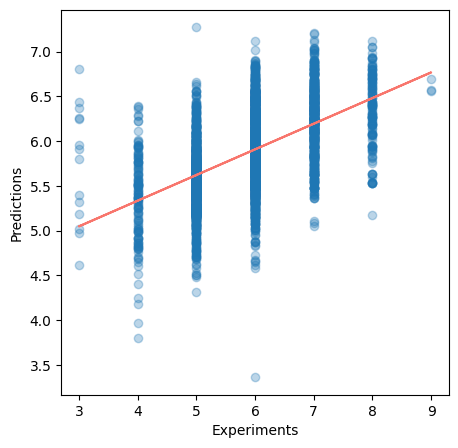

In [37]:
# Data visualization of prediction results

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predictions')
plt.xlabel('Experiments')